<a href="https://colab.research.google.com/github/alejandraberbesi/LLMs/blob/main/Intro_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# init

In [50]:
from huggingface_hub import login
from google.colab import userdata

HF_TOKEN = userdata.get("HF_TOKEN")  # Fetches the token from Colab Secrets
login(HF_TOKEN)

In [51]:
from transformers.utils import logging

logging.set_verbosity_error()  # Suppress progress bars and unnecessary logs

# Pipelines with hugging face

In [52]:
from transformers import pipeline

In [53]:
summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum") #model used for summarization

text = """
Artificial Intelligence (AI) is transforming various industries by enabling machines to perform tasks
that typically require human intelligence. These tasks include natural language processing, computer
vision, speech recognition, and decision-making. AI models, particularly deep learning models, are
trained on large datasets to recognize patterns and make predictions. In recent years, advancements in
AI have led to applications such as self-driving cars, medical diagnosis, and chatbots. Despite its
benefits, AI also raises ethical concerns, including bias in decision-making and the impact on employment.
As AI continues to evolve, researchers and policymakers must address these challenges to ensure
responsible AI development.
"""

summary = summarizer(text,
                     max_length=50 #limit response to 50 tokens
                     )

print(summary[0]["summary_text"])

AI models, particularly deep learning models, are trained on large datasets to recognize patterns and make predictions. In recent years, advancements in AI have led to applications such as self-driving cars, medical diagnosis, and chatbots


In [54]:
generator = pipeline("text-generation", model="gpt2")  # Model used for text generation

# Example customer complaint
customer_complaint = "The product was horrible, and the service was very slow."

# Predefined apology response
apology_response = "Dear client, we sincerely apologize for the inconvenience you reported"

# Create the prompt with structured input, this is how the response starts
prompt = f"""Customer complaint: {customer_complaint}.\nCompany's response to the customer: {apology_response}.  """

# Generate a response using the model
outputs = generator(
    prompt,
    max_length=150,  # Limit response to 150 tokens
    pad_token_id=generator.tokenizer.eos_token_id,  # Use EOS token to avoid padding issues (GPT-2 lacks a default pad token)
    truncation=True  # Truncate input if it's too long
)

# Print the generated text
print(outputs[0]["generated_text"])  # Extract and display the generated response

Customer complaint: The product was horrible, and the service was very slow..
Company's response to the customer: Dear client, we sincerely apologize for the inconvenience you reported.  ***************************
To be honest, the customer contacted me about four times. They have never contacted us about this and I really don't know what could have caused the customers problems. ***************************
To us customers this could not be your fault, the complaint. It appears that these three products were purchased at the same prices as two other packages, which resulted in total delivery costs for consumers. While it would be hard to find good prices, the price tag is not outrageous at all. In fact, I cannot see any way for us to claim,


In [55]:
spanish_text = "La inteligencia artificial esta cambiando el planeta"

translator = pipeline(task="translation_es_to_en", model="Helsinki-NLP/opus-mt-es-en")

translations = translator(spanish_text,
                          clean_up_tokenization_spaces=True #Fixes spacing issues
                          )

print(translations[0]["translation_text"])

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Artificial intelligence is changing the planet.


## transformers architecture

🔍 **What’s Different in Traditional NLP terms vs LLMs?**

1️⃣ Encoding in Traditional NLP = Simple static embeddings (Word2Vec, TF-IDF).

1️⃣.1️⃣ Encoding in LLMs = Context-aware representations (transformers track relationships between words).

2️⃣ Decoding in Traditional NLP = Retrieving stored text or using basic grammar rules.

2️⃣.1️⃣Decoding in LLMs = Generating new text using self-attention and autoregressive prediction.


| **Model Type**      | **Description**                                             | **Use Cases**                                      | **Example Models**               |
|---------------------|------------------------------------------------|-------------------------------------------------|--------------------------------|
| **Encoder**      | Reads and **understands** text, but doesn't generate new text | Classification, Sentiment Analysis, Named Entity Recognition (NER) | **BERT, RoBERTa, DistilBERT, ALBERT** |
| **Decoder**    | **Generates** text based on input (auto-regressive)  | Text Completion, Chatbots, Story Writing | **GPT-2, GPT-3, LLaMA, Falcon** |
| **Encoder-Decoder**  | First understands the input (encoder), then generates **transformed output** (decoder) | Summarization, Translation, Question Answering | **T5, BART, mBART, FLAN-T5** |


In [56]:
def identify_llm_architecture(model_pipeline):

    # Get the model architecture
    model = model_pipeline.model
    model_type = model.config.architectures[0].lower()  # Get architecture type, and make lowercase

    # Identify architecture based on the model type
    if "bert" in model_type or "roberta" in model_type or "deberta" in model_type:
        print(f"the model arch of {model_type} is Encoder")
    elif "gpt" in model_type or "opt" in model_type or "bloom" in model_type:
        print(f"the model arch of {model_type} is Decoder")
    elif "t5" in model_type or "bart" in model_type or "marian" in model_type:
        print(f"the model arch of {model_type} is Encoder-Decoder")
    else:
        print(f"Other architecture type: {model_type}")

In [57]:
summarizer.model.config.architectures

['T5ForConditionalGeneration']

In [58]:
identify_llm_architecture(summarizer)

the model arch of t5forconditionalgeneration is Encoder-Decoder


In [59]:
identify_llm_architecture(generator)

the model arch of gpt2lmheadmodel is Decoder


In [60]:
identify_llm_architecture(translator)

the model arch of marianmtmodel is Encoder-Decoder


In [72]:
#  extractive question-answering.
text= """
Bogotá is the capital of and largest city in Colombia. It is a place of convergence for people from all around the country and is therefore diverse and multicultural. Within this city, the past and present come together.
The city is also very green thanks to its parks and the hills that extend along its eastern boundary, dwarfed by their two highest points, Monserrate and Guadalupe. The landscape that the people of Bogotá enjoy daily—the sea of green that makes up the Andes mountain range, rising up in the east—would be nearly impossible to find in any other large city.
But Bogotá also has the colors of modern buildings and authentic colonial roof tiles that are a true historical treasure from the colonial era.
Thanks to this fusion of the past and present, Bogotá is an ideal location with history, entertainment, delicious cuisine, culture, business, and much more.
"""

question="what are the characteristics of bogota?"

qa = pipeline(task="question-answering", model="distilbert-base-uncased-distilled-squad")

output = qa(question=question, context=text)

print(output['answer'])
print("----------------")
identify_llm_architecture(qa)

history, entertainment, delicious cuisine, culture, business, and much more
----------------
the model arch of distilbertforquestionanswering is Encoder


In [73]:
#  generative question-answering

qa2 = pipeline(task="text-generation", model="gpt2")

input_text = f"Context: {text}\n\nQuestion: {question}\n\nAnswer:"

output = qa2(input_text,
             max_new_tokens=50 # controls only the number of tokens generated by the model, not the input length
             )

print(output[0]['generated_text'])
print("----------------")
identify_llm_architecture(qa2)

Context: 
Bogotá is the capital of and largest city in Colombia. It is a place of convergence for people from all around the country and is therefore diverse and multicultural. Within this city, the past and present come together.
The city is also very green thanks to its parks and the hills that extend along its eastern boundary, dwarfed by their two highest points, Monserrate and Guadalupe. The landscape that the people of Bogotá enjoy daily—the sea of green that makes up the Andes mountain range, rising up in the east—would be nearly impossible to find in any other large city.
But Bogotá also has the colors of modern buildings and authentic colonial roof tiles that are a true historical treasure from the colonial era.
Thanks to this fusion of the past and present, Bogotá is an ideal location with history, entertainment, delicious cuisine, culture, business, and much more.


Question: what are the characteristics of bogota?

Answer: the city contains a huge cultural tradition but at 

# finetuning

In [1]:
!pip install transformers datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00


In [18]:
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, DistilBertTokenizerFast
from datasets import load_dataset,Dataset
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [19]:
# Load tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

In [20]:
np.unique(load_dataset("ag_news", split="train")["label"])

array([0, 1, 2, 3])

In [21]:
# Load a pre-trained model for classification
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=4)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
train_data = load_dataset("ag_news", split="train")
test_data = load_dataset("ag_news", split="test")

# Shard (divide) the data to a small portion(useful for quick testing)
train_data = train_data.shard(num_shards=20, index=0)
test_data = test_data.shard(num_shards=20, index=0)

# Example texts for tokenization (we use the 'text' column)
train_texts = train_data["text"]
test_texts = test_data["text"]

print(train_texts[0])

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


In [23]:
# Tokenize the training and test data
tokenized_training_data = tokenizer(
    train_texts,
    padding=True,#Pad all sequences to the same length as the longest sequence in the batch
    truncation=True, #Truncate any input that is longer than the model’s maximum allowed length
    max_length=50 #If a sequence has more than 50 tokens, it gets truncated to 50
)

tokenized_test_data = tokenizer(
    test_texts,
    padding=True,
    truncation=True,
    max_length=50
)

In [24]:
# Print out tokenized data samples
print(tokenized_training_data['input_ids'][0])

[101, 2813, 2358, 1012, 6468, 15020, 2067, 2046, 1996, 2304, 1006, 26665, 1007, 26665, 1011, 2460, 1011, 19041, 1010, 2813, 2395, 1005, 1055, 1040, 11101, 2989, 1032, 2316, 1997, 11087, 1011, 22330, 8713, 2015, 1010, 2024, 3773, 2665, 2153, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]


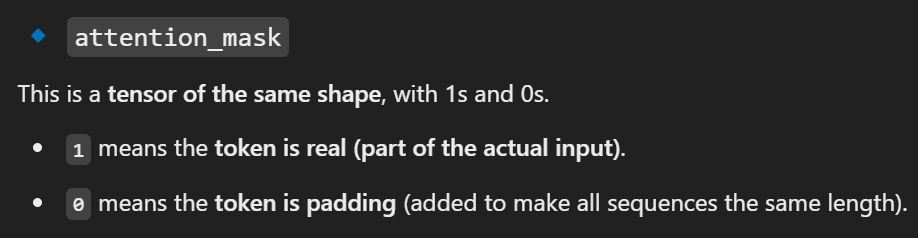

In [37]:
print(tokenized_training_data['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
# Create train and test datasets
train_dataset = Dataset.from_dict({
    'input_ids': tokenized_training_data['input_ids'],
    'attention_mask': tokenized_training_data['attention_mask'],
    'labels': train_data['label']
})

test_dataset = Dataset.from_dict({
    'input_ids': tokenized_test_data['input_ids'],
    'attention_mask': tokenized_test_data['attention_mask'],
    'labels': test_data['label']
})

In [27]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',               # Output directory for saving model checkpoints and logs
    num_train_epochs=3,                   # Number of training epochs
    per_device_train_batch_size=16,       # Batch size for training
    per_device_eval_batch_size=64,        # Batch size for evaluation
    warmup_steps=500,                     # number of steps (or iterations) in which the learning rate will linearly increase from a very small value to the initial learning rate set
    weight_decay=0.01,                    # Strength of weight decay for regularization
    report_to="none"
    )

In [34]:
def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(axis=-1)  # Convert logits to predicted class

    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='weighted')  # For multiclass, use 'weighted'

    return {"accuracy": accuracy, "f1": f1}

In [35]:
# Set up the trainer
trainer = Trainer(
    model=model,                          # The model to train
    args=training_args,                   # Training arguments (from TrainingArguments)
    train_dataset=train_dataset,          # The dataset for training
    eval_dataset=test_dataset,            # The dataset for evaluation
    processing_class=tokenizer,                  # Tokenizer to process the input texts
    compute_metrics=compute_metrics
    )

# Start training
trainer.train()

Step,Training Loss
500,0.040000
1000,0.041000


TrainOutput(global_step=1125, training_loss=0.04108838229709202, metrics={'train_runtime': 130.6336, 'train_samples_per_second': 137.79, 'train_steps_per_second': 8.612, 'total_flos': 232861154400000.0, 'train_loss': 0.04108838229709202, 'epoch': 3.0})

In [36]:
# Evaluate the model
eval_results = trainer.evaluate()

# Print out the evaluation results
print(eval_results)

{'eval_loss': 0.45513635873794556, 'eval_accuracy': 0.9184210526315789, 'eval_f1': 0.9184752190634689, 'eval_runtime': 0.6023, 'eval_samples_per_second': 630.932, 'eval_steps_per_second': 9.962, 'epoch': 3.0}
